# Лабораторная работа: многослойный перцептрон и сверточные нейросети

## Handwritten digit analysis

Рассмотрим решение задачи классификации рукописных цифр с помощью многослойного перцептрона.

Проведем исследовние на *"жизненных"* примерах:
   * примеры рукописных цифр, сденные ручкой ("перо")
   * примеры, сделанные в paint ("кисть")
Загрузка обучающих и тестовых примеров из  датасета `MNIST` ():
  * датасет из [Keras](https://keras.io/datasets/) Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 [images](https://keras.io/datasets/#mnist-database-of-handwritten-digits).
  * датасет из [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits )

## Материалы

[Convolutional arithmetics](https://github.com/vdumoulin/conv_arithmetic?source=post_page-----3bd2b1164a53----------------------)





## Модель 1: Многослойный перцептрон

In [16]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense, Dropout, Flatten
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import CSVLogger

from PIL import Image

%matplotlib inline

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
x_train = x_train / 255
x_test = x_test / 255

In [19]:
image_matrices = []
image_paths = [
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/0.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/1.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/2.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/3.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/4.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/5.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/6.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/7.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/8.png',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/painted/9.png',
]

for path in image_paths:
    img = Image.open(path)
    img_gray = img.convert('L')
    img_array = np.array(img_gray)
    image_matrices.append(img_array)

my_X_test_p = np.array(image_matrices)
my_X_test_p = my_X_test_p / 255

In [20]:
my_y_test = np.eye(10, dtype=float)

In [21]:
image_matrices_h = []
image_paths_h = [
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw0.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw1.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw2.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw3.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw4.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw5.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw6.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw7.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw8.JPG',
    '/content/drive/MyDrive/DLinAT-2024-A/images/digits/handwritten/hw9.JPG',
]

for path in image_paths_h:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    inverted_image = cv2.bitwise_not(image)
    resized_image = cv2.resize(inverted_image, (28, 28))
    image_array = np.array(resized_image)
    image_matrices_h.append(image_array)

my_X_test_h = np.array(image_matrices_h)
my_X_test_h = my_X_test_h / 255

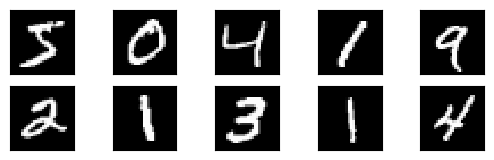

In [22]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray', interpolation='nearest')

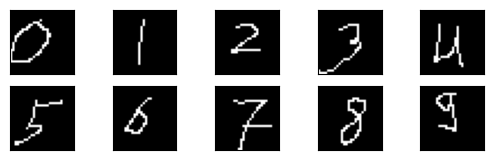

In [23]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(my_X_test_p[i], cmap='gray')

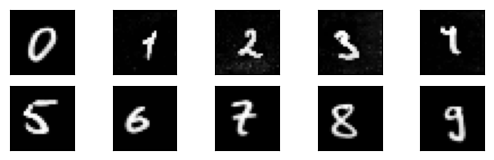

In [24]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(my_X_test_h[i], cmap='gray')

In [25]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [26]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [27]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
history = None

In [31]:
csv_logger = CSVLogger('/content/drive/MyDrive/neural-models/mnist-perceptron-training.log', separator=',', append=False)
history = model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2, callbacks=[csv_logger])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8625 - loss: 0.4817 - val_accuracy: 0.9565 - val_loss: 0.1566
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9603 - loss: 0.1358 - val_accuracy: 0.9663 - val_loss: 0.1148
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0860 - val_accuracy: 0.9672 - val_loss: 0.1007
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9802 - loss: 0.0640 - val_accuracy: 0.9750 - val_loss: 0.0844
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9854 - loss: 0.0511 - val_accuracy: 0.9717 - val_loss: 0.0884


In [32]:
model.save('/content/drive/MyDrive/neural-models/mnist-perceptron.h5')

In [33]:
# model = load_model('/content/drive/MyDrive/neural-models/mnist-perceptron.h5')

# history = pd.read_csv('/content/drive/MyDrive/neural-models/mnist-perceptron-training.log', sep=',', engine='python')

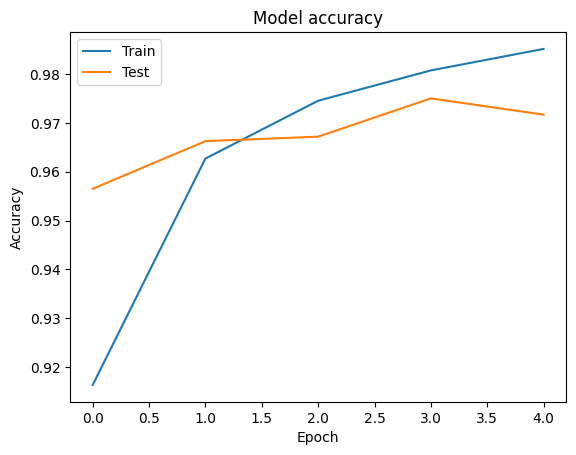

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

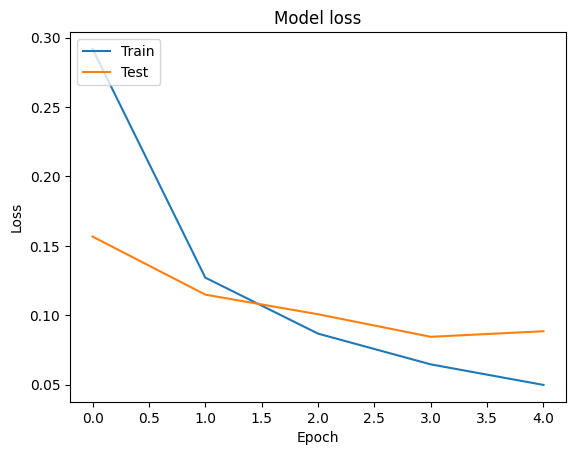

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [107]:
mnist_loss_accuracy_perc = model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9693 - loss: 0.0916


## Собственная подборка ДОМАШКА

In [108]:
painted_loss_accuracy_perc = model.evaluate(my_X_test_p, my_y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3000 - loss: 3.9067


In [109]:
handwritten_loss_accuracy_perc = model.evaluate(my_X_test_h, my_y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2000 - loss: 2.5349


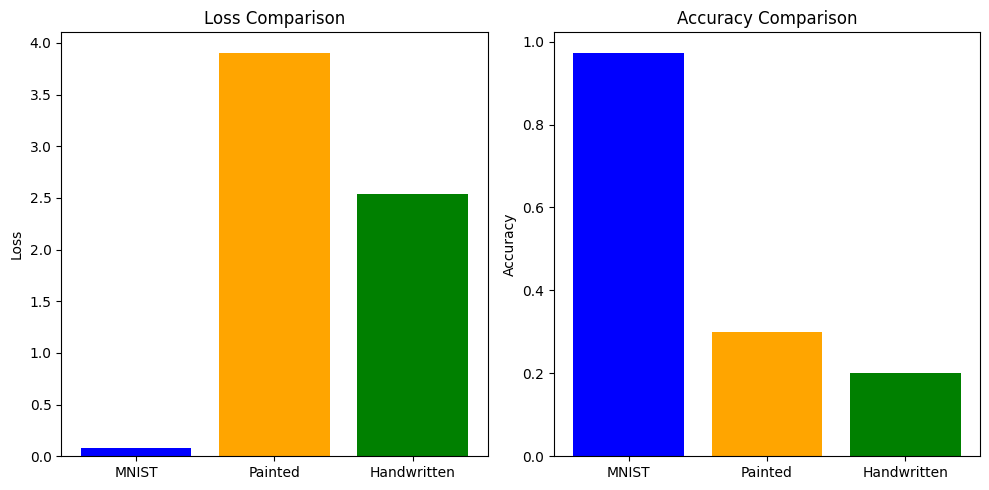

In [111]:
labels = ['MNIST', 'Painted', 'Handwritten']

losses = [mnist_loss_accuracy_perc[0], painted_loss_accuracy_perc[0], handwritten_loss_accuracy_perc[0]]
accuracies = [mnist_loss_accuracy_perc[1], painted_loss_accuracy_perc[1], handwritten_loss_accuracy_perc[1]]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, losses, color=['blue', 'orange', 'green'])
plt.title('Loss Comparison')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

## Модель 2: Сверточная нейронная сеть (CNN)

### Предварителные исследования



In [40]:
model_Test = models.Sequential()

model_Test.add(
    Conv2D(
        1,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150,150,1)
        )
    )

model_Test.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 1)         │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model_Test3 = models.Sequential()

model_Test3.add(
    Conv2D(
        1,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150,150,3)
        )
    )

model_Test3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 1)         │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28 (112.00 B)

 Trainable params: 28 (112.00 B)

 Non-trainable params: 0 (0.00 B)

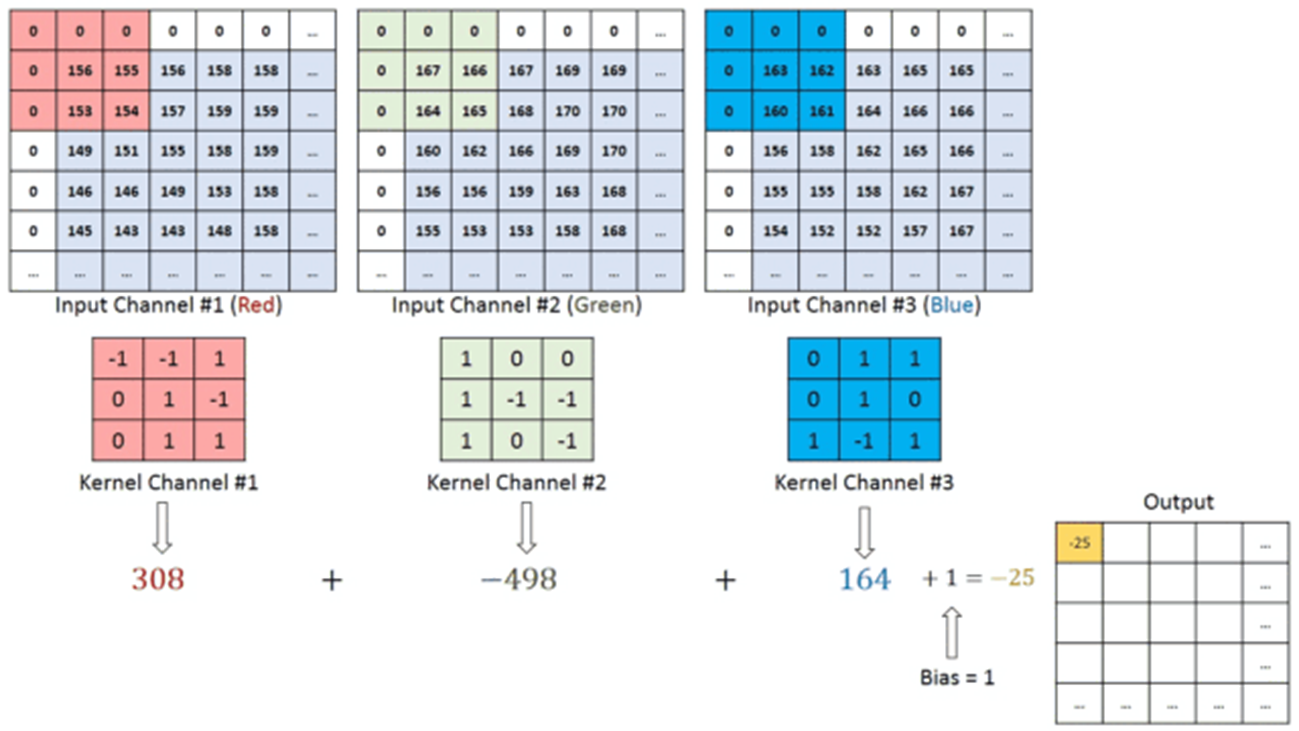

In [42]:
model_Test35 = models.Sequential()

model_Test35.add(
    Conv2D(
        5,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150,150,3)
        )
    )

model_Test35.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 5)         │             140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140 (560.00 B)

 Trainable params: 140 (560.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
input_shape = (28, 28, 1)
num_classes = 10

model2 = models.Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [44]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
csv_logger_2 = CSVLogger('/content/drive/MyDrive/neural-models/mnist-cnn-training.log', separator=',', append=False)
history = model2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 156s 103ms/step - accuracy: 0.8602 - loss: 0.4390 - val_accuracy: 0.9817 - val_loss: 0.0608
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 209s 108ms/step - accuracy: 0.9718 - loss: 0.0969 - val_accuracy: 0.9872 - val_loss: 0.0429
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 187s 98ms/step - accuracy: 0.9777 - loss: 0.0733 - val_accuracy: 0.9881 - val_loss: 0.0422
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 203s 99ms/step - accuracy: 0.9827 - loss: 0.0535 - val_accuracy: 0.9868 - val_loss: 0.0445
Epoch 5/5
1259/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.9856 - loss: 0.0462

In [ ]:
model2.save('/content/drive/MyDrive/neural-models/mnist-cnn.h5')

In [ ]:
# model = load_model('/content/drive/MyDrive/neural-models/mnist-cnn.h5')

# history = pd.read_csv('/content/drive/MyDrive/neural-models/mnist-cnn-training.log', sep=',', engine='python')

In [67]:
model2 = load_model('/content/drive/MyDrive/neural-models/mnist-cnn.h5')

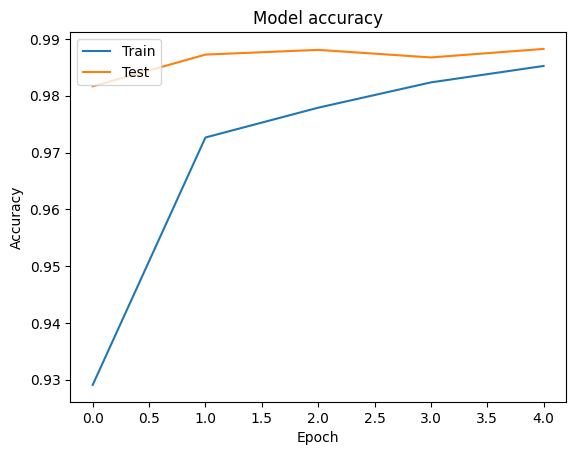

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

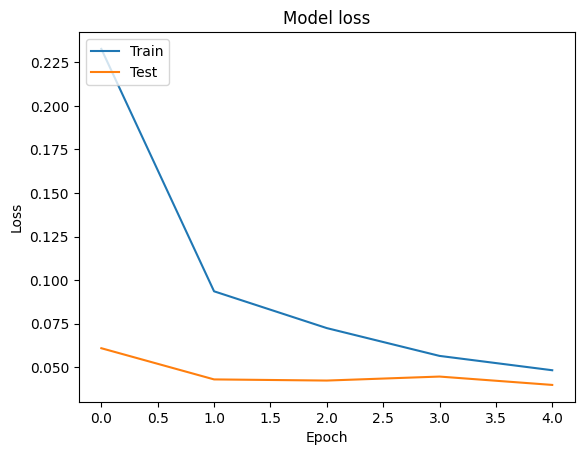

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [112]:
mnist_loss_accuracy_cnn = model2.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9879 - loss: 0.0383


## Собственная подборка ДОМАШКА

In [113]:
painted_loss_accuracy_cnn = model2.evaluate(my_X_test_p, my_y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6000 - loss: 2.9435


In [114]:
handwritten_loss_accuracy_cnn = model2.evaluate(my_X_test_h, my_y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6000 - loss: 2.9533


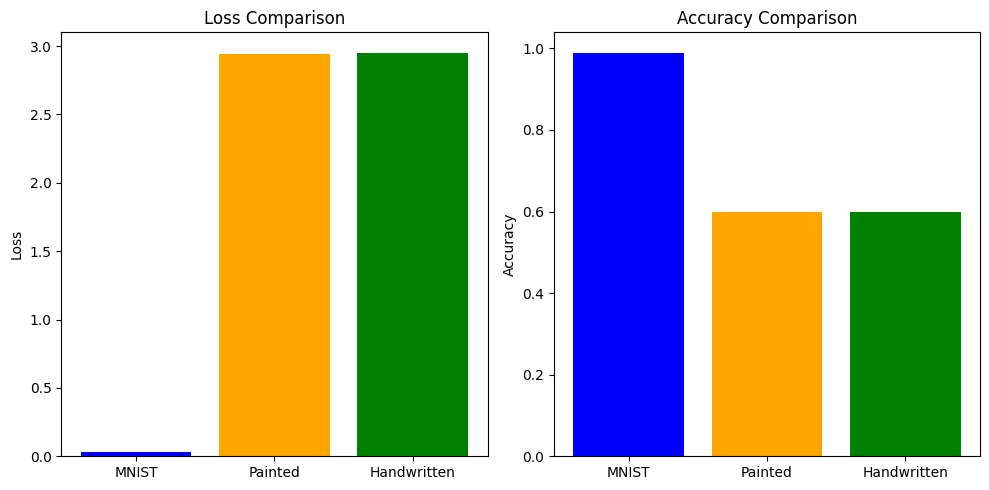

In [115]:
labels = ['MNIST', 'Painted', 'Handwritten']

losses = [mnist_loss_accuracy_cnn[0], painted_loss_accuracy_cnn[0], handwritten_loss_accuracy_cnn[0]]
accuracies = [mnist_loss_accuracy_cnn[1], painted_loss_accuracy_cnn[1], handwritten_loss_accuracy_cnn[1]]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, losses, color=['blue', 'orange', 'green'])
plt.title('Loss Comparison')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# model2.evaluate(X, y) ???????????

In [ ]:
# plt.imshow(my_X_test_h[0], cmap='gray')

In [ ]:
X = np.array(x_test[0])

In [ ]:
x_test[:1].shape

In [ ]:
x_tmp = x_test[:1]
x_tmp.shape

In [ ]:
y_tmp = y_test_cat[:1]
y_tmp.shape

## Проверка распознанности

Построить матрицу ошибок с правильными классами на главной диаганали. Вывести ошибки и понять, почему возникли ошибки.

In [ ]:
y_pred = model2.predict(x_test)
y_pred_probs = np.argmax(y_pred, axis=1)

In [ ]:
y_test

In [ ]:
cm = confusion_matrix(y_test, y_pred_probs)
cm

In [ ]:
maximums = []
for i in range(len(cm)):
  for j in range(len(cm[0])):
    if i != j and cm[i, j] != 0:
      maximums.append((i, j, cm[i, j]))

smaximums = sorted(
    maximums,
    key=lambda x: x[2],
    reverse=True
)

smaximums

In [ ]:
#if model2.evaluate(x_test[:1], y_test_cat[:1])[1] <= 1.5:
#    plt.imshow(x_train[1], cmap='gray', interpolation='nearest')

In [ ]:
#for i in range(10):
#  if model2.evaluate(x_test[i-1:i], y_test_cat[i-1:i])[1] <= 0.5:
#    plt.imshow(x_train[i], cmap='gray', interpolation='nearest')

In [73]:
import glob

In [133]:
image_list = []
image_classes = []
for filename in glob.glob('/content/drive/MyDrive/digits_dataset/paint/*'):
    im=Image.open(filename)
    image_list.append(im)
    image_classes.append(float(filename[44:45]))

In [134]:
image_classes_cat = keras.utils.to_categorical(image_classes, 10)

In [135]:
image_matrices = []

for img in image_list:
  img_gray = img.convert('L')
  img_array = np.array(img_gray)
  image_matrices.append(img_array)

common_X_test_p = np.array(image_matrices)
common_X_test_p = common_X_test_p / 255

In [136]:
common_X_test_p.shape

(220, 28, 28)

In [156]:
import math

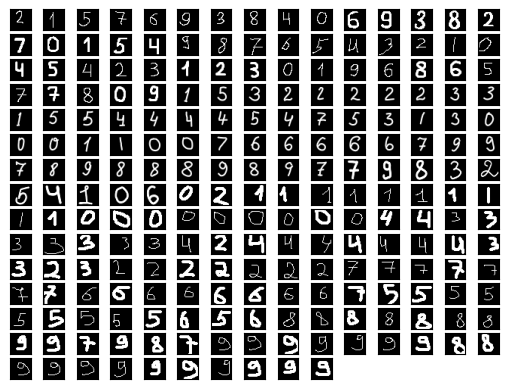

In [160]:
dim = int(math.sqrt(len(common_X_test_p))) + 1

for i in range(220):
  plt.subplot(dim,dim,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(common_X_test_p[i], cmap='gray')

In [161]:
image_list_hc = []
image_classes_hc = []
for filename in glob.glob('/content/drive/MyDrive/digits_dataset/hw/*'):
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    inverted_image = cv2.bitwise_not(image)
    image_list_hc.append(inverted_image)
    image_classes_hc.append(float(filename[41:42]))

In [162]:
image_classes_cat_hc = keras.utils.to_categorical(image_classes_hc, 10)

In [163]:
image_matrices_hc = []

for img in image_list_hc:
  resized_image = cv2.resize(img, (28, 28))
  image_matrices_hc.append(np.array(resized_image))

common_X_test_h = np.array(image_matrices_hc)
common_X_test_h = common_X_test_h / 255

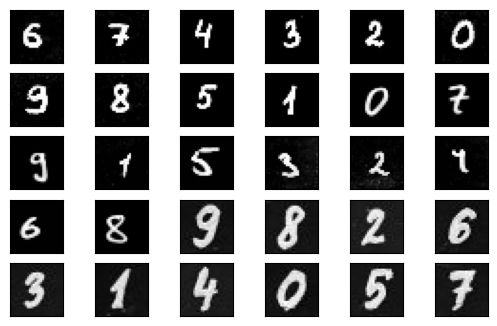

In [164]:
dim = int(math.sqrt(len(common_X_test_h))) + 1

for i in range(len(common_X_test_h)):
  plt.subplot(dim,dim,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(common_X_test_h[i], cmap='gray')

In [117]:
common_perc = model.evaluate(common_X_test_p, image_classes_cat)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5955 - loss: 3.0393 


In [118]:
common_cnn = model2.evaluate(common_X_test_p, image_classes_cat)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7463 - loss: 1.4362


In [166]:
common_perc_h = model.evaluate(common_X_test_h, image_classes_cat_hc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2000 - loss: 4.9285


In [167]:
common_cnn_h = model2.evaluate(common_X_test_h, image_classes_cat_hc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6667 - loss: 2.3044


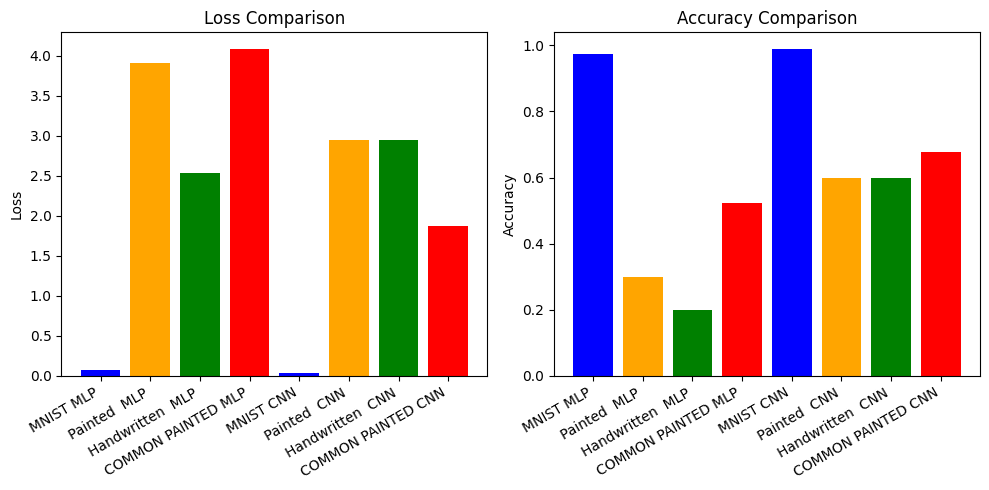

In [125]:
labels = ['MNIST MLP', 'Painted  MLP', 'Handwritten  MLP', 'COMMON PAINTED MLP', 'MNIST CNN', 'Painted  CNN', 'Handwritten  CNN', 'COMMON PAINTED CNN']

losses = [mnist_loss_accuracy_perc[0], painted_loss_accuracy_perc[0], handwritten_loss_accuracy_perc[0], common_perc[0], mnist_loss_accuracy_cnn[0], painted_loss_accuracy_cnn[0], handwritten_loss_accuracy_cnn[0], common_cnn[0]]
accuracies = [mnist_loss_accuracy_perc[1], painted_loss_accuracy_perc[1], handwritten_loss_accuracy_perc[1], common_perc[1], mnist_loss_accuracy_cnn[1], painted_loss_accuracy_cnn[1], handwritten_loss_accuracy_cnn[1], common_cnn[1]]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, losses, color=['blue', 'orange', 'green', 'red'])
plt.title('Loss Comparison')
plt.ylabel('Loss')
plt.xticks(rotation=30, ha='right')

plt.subplot(1, 2, 2)
plt.bar(labels, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()